In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nn
import numpy as np

from tensor import *
from utils import *
from grad import Grad
from optim import Adam

In [3]:
class Model(nn.Module[Tensor]):
    def __init__(self, inc, outc) -> None:
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(inc, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, outc),
        )

    def forward(self, x):
        return self.seq(x)

In [7]:
from tqdm import tqdm
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X, y = X.astype(np.float32), y.astype(np.int32)  # type: ignore
np.random.seed(0)
model = Model(X.shape[1], 10)
optimizer = Adam(model.parameters(),lr=.001)

In [ ]:
losses = []
accs = []
for _ in range(10):
    epoch_loss = []
    epoch_acc = []
    for batch_X, batch_y in (bar:= tqdm(DataLoader(X, y, batch_size=128))):
        batch_X = Tensor.from_numpy(batch_X)
        batch_y = Tensor.from_numpy(batch_y)
        with Grad.on():
            logits = model.forward(batch_X)
            loss = nn.cross_entropy(logits, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred = logits.numpy().argmax(-1)
        acc = (pred==batch_y.numpy()).mean()


        epoch_loss.append(loss.numpy().item())
        epoch_acc.append(acc)
        bar.set_description(f"Loss: {epoch_loss[-1]:.2f}")
        
    losses.append(np.mean(epoch_loss))
    accs.append(np.mean(epoch_acc))

  0%|          | 0/14 [00:00<?, ?it/s]

Loss: 1.77: : 15it [00:00, 22.95it/s]                      
Loss: 0.26: : 15it [00:00, 26.68it/s]                      
Loss: 0.58: : 15it [00:00, 26.87it/s]                      
Loss: 0.15: : 15it [00:00, 24.59it/s]                      
Loss: 0.08: : 15it [00:00, 24.09it/s]                      
Loss: 0.20: : 15it [00:00, 26.45it/s]                      
Loss: 0.38: : 15it [00:00, 25.55it/s]                      
Loss: 0.35: : 15it [00:00, 27.73it/s]                      
Loss: 0.08: : 15it [00:00, 28.18it/s]                      
Loss: 0.12: : 15it [00:00, 26.48it/s]                      


<Axes: >

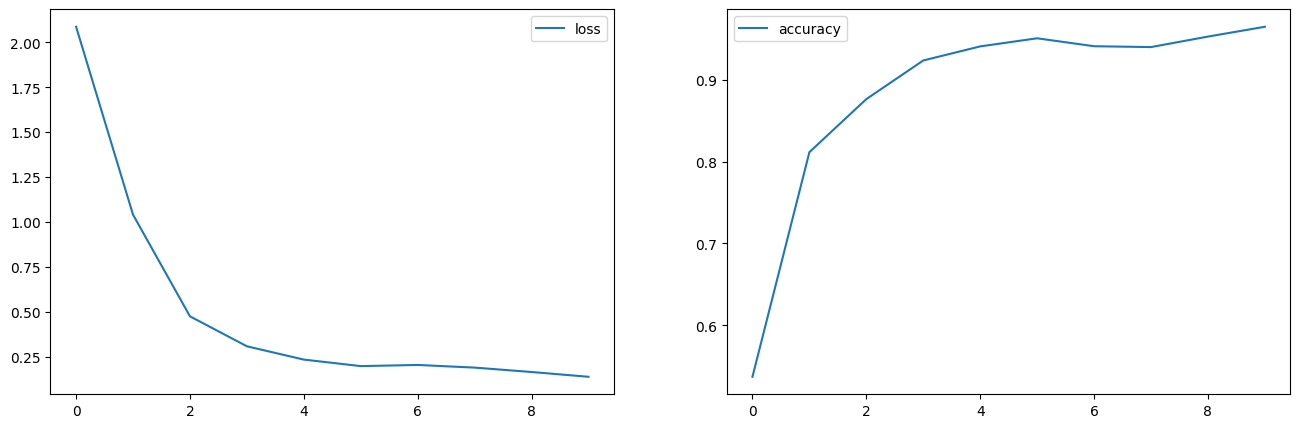

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
_, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
sns.lineplot(losses,ax=ax1,label="loss")
sns.lineplot(accs,ax=ax2,label="accuracy")